<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab3/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

#defolf regression + l2 reg

class LinearRegression:
  def __init__(self, bias = False, C = 0):
    self.c, self.bias = C, bias

  def loss(self, x,  y, coef_=None):
    if self.bias: x = np.insert(x, 0, 1, axis=1)
    coef_ = self.coef_ if coef_ is None else coef_
    return (y - x @ coef_) @ (y - x @ coef_)

  def fit(self, x, y):
    if self.bias:
      x = np.insert(x, 0, 1, axis=1)
    self.coef_ = np.linalg.inv(x.T @ x + self.c * np.eye(x.shape[1])) @ x.T @ y
    return self

  def predict(self, x):
    if self.bias: x = np.insert(x, 0, 1, axis=1)
    return x @ self.coef_

  def score(self, x, y):
    out = self.predict(x)
    return 1 - ((y - out) @ (y - out)) / ((y - y.mean()) @ (y - y.mean()))



In [ ]:
#linear regression + svd + l2

class LinearRegressionSVD(LinearRegression):
  def __init__(self, bias = False, C = 0):
    super().__init__(bias, C)
    self.svd = None

  def fit(self, x, y):
    if self.bias: x = np.insert(x, 0, 1, axis=1)
    self.svd = np.linalg.svd(x, full_matrices=False)

    U, S, Vt = self.svd

    self.coef_ =  Vt.T @ np.diag(S / (S * S + self.c)) @ U.T @ y
    return self


In [ ]:
# linear regression + l2 + gd

class LinearRegressionGD(LinearRegression):
  def __init__(self, bias = False, C = 0):
    super().__init__(bias, C)
    self.svd = None
    self.gradient = lambda x, y, coef_: (x.T @ (x @ coef_ - y) + self.c * coef_) / x.shape[0]

  def fit(self, x, y,speed = 10, lerning_rate=0.99, epochs = 100):
    if self.bias: x = np.insert(x, 0, 1, axis=1)
    self.coef_ = np.random.random(x.shape[1])
    for _ in range(epochs):
      self.coef_ -= lerning_rate * self.gradient(x, y, self.coef_)
    return self


In [ ]:
from sklearn.model_selection import train_test_split

def validation(model, x, y, x_transform, show=True):
  train = list()
  test = list()

  for f in x_transform:
    x_train, x_test, y_train, y_test = train_test_split(f(x),y)
    test.append(model.fit(x_train, y_train).score(x_test, y_test))
    train.append(model.fit(x_train, y_train).score(x_train, y_train))
  if show:
    import matplotlib.pyplot as plt
    plt.plot(train,'r-o')
    plt.plot(test,'b-o')
    plt.legend(['Train', 'Test'])
    plt.show()
  return train,test


In [ ]:
#task1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.95145e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


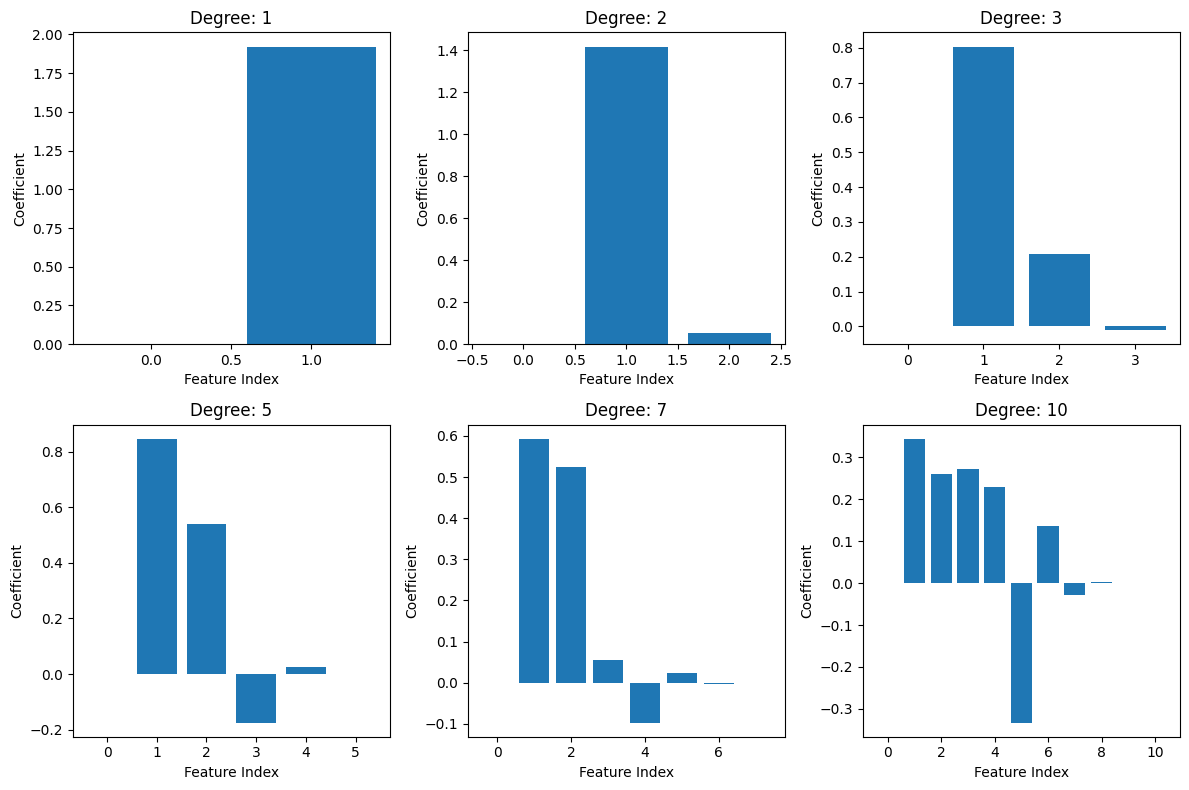

In [ ]:
# ridge
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X[:, 0] + 5 + np.random.randn(100) * 2

degrees = [1, 2, 3, 5, 7 , 10]
alpha = 1.0

plt.figure(figsize=(12, 8))
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    plt.subplot(2, 3, i + 1)
    plt.bar(range(len(ridge.coef_)), ridge.coef_)
    plt.title(f'Degree: {degree}')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.667e+01, tolerance: 2.772e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e+02, tolerance: 2.772e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+02, tolerance: 2.772e

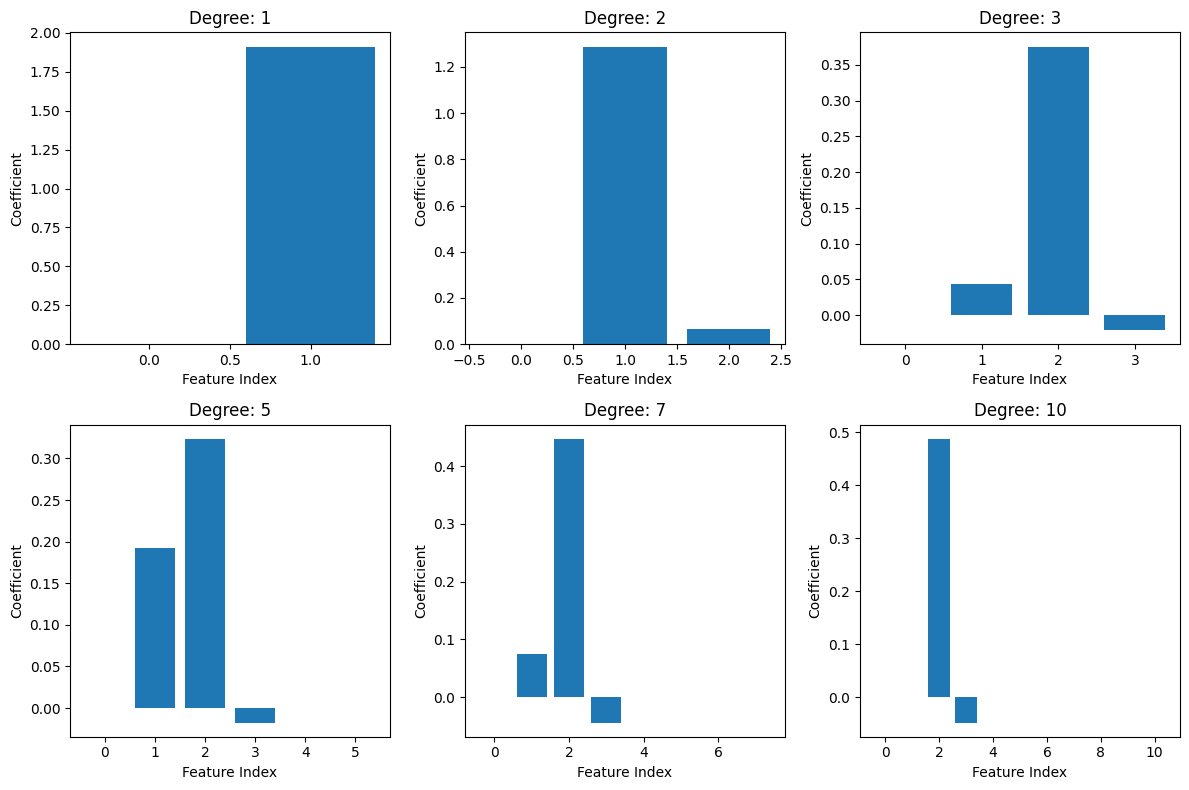

In [ ]:
#lasso
from sklearn.linear_model import Lasso

alpha = 0.1

plt.figure(figsize=(12, 8))
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    plt.subplot(2, 3, i + 1)
    plt.bar(range(len(lasso.coef_)), lasso.coef_)
    plt.title(f'Degree: {degree}')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()


In [ ]:
#task2

In [ ]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 100 * rng.rand(60)
y = x**2/10 + 0.9 * rng.randn(60)
x=x.reshape(-1,1)

In [ ]:
from sklearn.datasets import make_regression
model = LinearRegressionSVD()
feature_preprocess = [PolynomialFeatures(degree=degree).fit_transform for degree in range(2,6)]

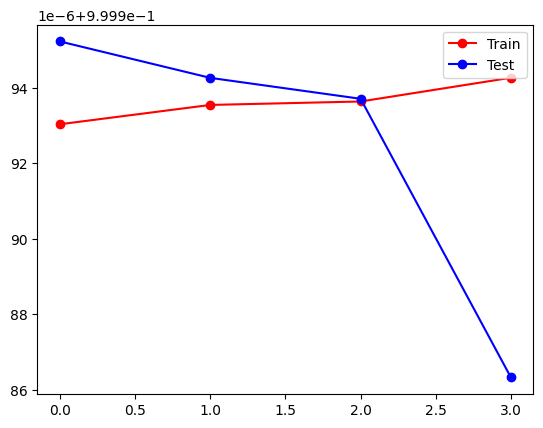

In [ ]:
#переобучение
validation(model,x,y, feature_preprocess);

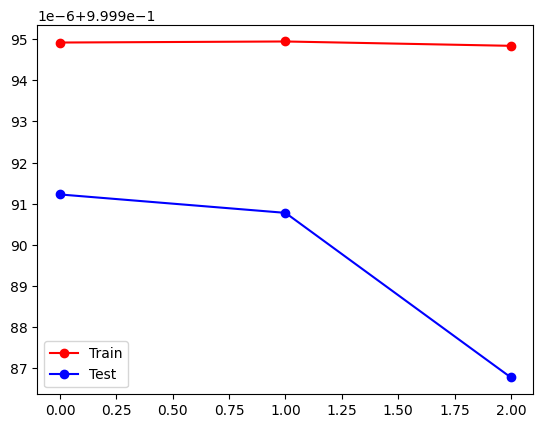

In [ ]:
from sklearn.datasets import make_regression
model = LinearRegressionSVD(C=10)
feature_preprocess = [PolynomialFeatures(degree=degree).fit_transform for degree in range(2,5)]
#норм
validation(model,x,y, feature_preprocess);

In [ ]:
#task3

In [ ]:
x,y = make_regression(100,3)
print(LinearRegression(C=2).fit(x,y).score(x,y))
print(LinearRegressionSVD(C=2).fit(x,y).score(x,y))
print(LinearRegressionGD(C=2).fit(x,y).score(x,y))

0.9995980812384083
0.9995980812384083
0.9995980812384083


In [ ]:
#task4

In [ ]:
import pandas as pd
bicycle_weather = pd.read_csv('/content/BicycleWeather.csv')
fermont_bridge = pd.read_csv('/content/fremont-bridge.csv')

In [ ]:
bicycle_weather['DATE'] = pd.to_datetime(bicycle_weather['DATE'], format='%Y%m%d')

In [ ]:
fermont_bridge['Date'] = pd.to_datetime(fermont_bridge['Date'], format='%m/%d/%Y %H:%M')

In [ ]:
weather_frist, weather_last = bicycle_weather['DATE'].min(), bicycle_weather['DATE'].max()
bridge_first, bridge_last =  fermont_bridge['Date'].min(), fermont_bridge['Date'].max()
first_day, last_day = pd.DataFrame([weather_frist, bridge_first]).max()[0], pd.DataFrame([weather_last, bridge_last]).min()[0]
first_day, last_day

(Timestamp('2012-10-03 00:00:00'), Timestamp('2015-09-01 00:00:00'))

In [ ]:
bicycle_weather.query(f"'{first_day}' <= DATE < '{last_day}'").drop(['STATION', 'STATION_NAME', 'DATE'], axis=1).describe()

,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,...,1063.0,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,29.296331,0.098777,-37.496707,166.858890,84.414864,31.813735,176.260583,34.422389,71.453434,-57.748824,...,-9999.0,-9980.185325,-9453.374412,-9914.333960,-9989.592662,-9020.636877,-8785.453434,-9839.075259,-9942.555974,-9914.333960
std,65.813321,2.570041,612.512583,74.778183,50.888861,14.234951,103.612075,1244.750594,25.892605,1230.026019,...,0.0,433.554601,2272.312916,916.669264,306.713836,2972.330395,3266.926793,1255.051111,749.521730,916.669264
min,0.000000,0.000000,-9999.000000,-16.000000,-71.000000,4.000000,10.000000,-9999.000000,27.000000,-9999.000000,...,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,0.000000,0.000000,0.000000,111.000000,44.000000,22.000000,100.000000,120.000000,54.000000,67.000000,...,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,0.000000,0.000000,0.000000,150.000000,83.000000,29.000000,200.000000,200.000000,67.000000,89.000000,...,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,25.000000,0.000000,0.000000,222.000000,128.000000,40.000000,230.000000,240.000000,89.000000,112.000000,...,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
max,559.000000,80.000000,74.000000,356.000000,183.000000,95.000000,360.000000,360.000000,192.000000,264.000000,...,-9999.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
temp = bicycle_weather.query(f"'{first_day}' <= DATE < '{last_day}'").drop(['STATION', 'STATION_NAME', 'DATE'], axis=1)
data_weather =  temp[temp.columns.to_list()[:10]].replace(-9999, -1).values # temp.replace(-9999, -1)

In [ ]:
temp = fermont_bridge.query(f"'{first_day}' <= Date < '{last_day}'")
temp.loc[:, 'Date'] = temp['Date'].apply(lambda day: day.date())
temp = temp.groupby('Date').sum()
ferm_west, ferm_east = temp['West'].to_numpy(), temp['East'].to_numpy()
data_ferm = ferm_west + ferm_east
data_ferm[:5]

array([3521., 3475., 3148., 2006., 2142.])

In [ ]:
model = LinearRegressionSVD(C=3)
feature_preprocess = [PolynomialFeatures(degree=degree).fit_transform for degree in range(1,4)]

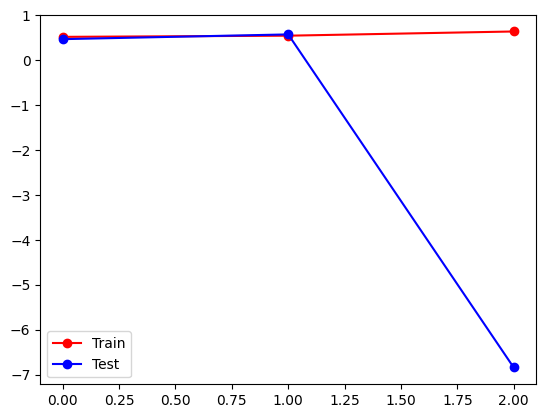

([0.5218312156320426, 0.5480442107459598, 0.641773302469345],
 [0.4709513492784121, 0.5764981368969693, -6.840617929916589])

In [ ]:
validation(model, data_weather, data_ferm, feature_preprocess)

In [ ]:
max(model.coef_)

140.63668071942095

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/autompg-dataset -p /content/sample_data/lab3;
!unzip /content/sample_data/lab3/autompg-dataset.zip -d /content/sample_data/lab3;

Dataset URL: https://www.kaggle.com/datasets/uciml/autompg-dataset
License(s): CC0-1.0
  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 9.46MB/s]
Archive:  /content/sample_data/lab3/autompg-dataset.zip
  inflating: /content/sample_data/lab3/auto-mpg.csv  


In [ ]:
data = pd.read_csv("/content/sample_data/lab3/auto-mpg.csv").replace("?", np.nan).dropna();
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
x = data.drop(columns = ["car name", "mpg"]).values
y = data["mpg"].values

In [ ]:
model = LinearRegressionSVD()
feature_preprocess = [PolynomialFeatures(degree=degree).fit_transform for degree in range(1,4)]

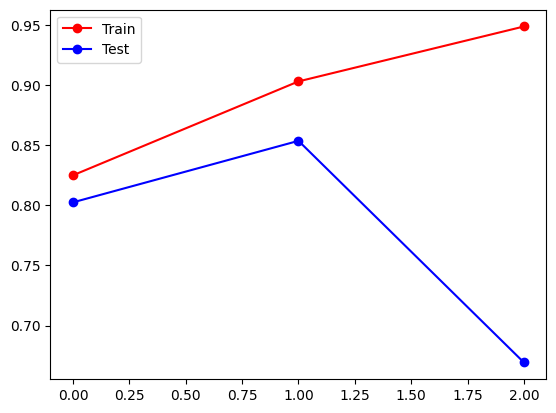

([0.8249294099948123, 0.9029749166972871, 0.9486536447392276],
 [0.8024240505206662, 0.8535629316058785, 0.6692621487017794])

In [ ]:
validation(model, x,y, feature_preprocess)

In [ ]:
!kaggle datasets download -d altavish/boston-housing-dataset -p /content/sample_data/lab3;
!unzip /content/sample_data/lab3/boston-housing-dataset.zip -d /content/sample_data/lab3;

Dataset URL: https://www.kaggle.com/datasets/altavish/boston-housing-dataset
License(s): CC0-1.0
  0% 0.00/11.7k [00:00<?, ?B/s]
100% 11.7k/11.7k [00:00<00:00, 17.2MB/s]
Archive:  /content/sample_data/lab3/boston-housing-dataset.zip
  inflating: /content/sample_data/lab3/HousingData.csv  


In [ ]:
data = pd.read_csv("/content/sample_data/lab3/HousingData.csv").replace("?", np.nan).dropna();
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
x = data.drop(columns = ["MEDV"]).values
y = data["MEDV"].values

In [ ]:
model = LinearRegressionSVD(C=100)
feature_preprocess = [PolynomialFeatures(degree=degree).fit_transform for degree in range(1,3)]

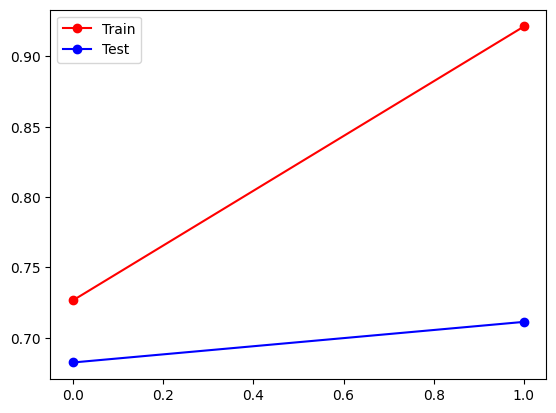

([0.7266772861235666, 0.9212731525661189],
 [0.6824921407423667, 0.7113457635440942])

In [ ]:
validation(model, x,y, feature_preprocess)

In [ ]:
#task5

In [ ]:
x,y = make_regression(n_samples = 100, n_features = 2)

model = LinearRegressionSVD()

In [ ]:
x_ = y_  = np.linspace(-100,100,100)

In [ ]:
X,Y = np.meshgrid(x_,y_)
Z = np.array([[model.loss(x, y, np.array([xi,yi])) for xi,yi in zip(xl, yl)] for xl, yl in zip(X, Y)])

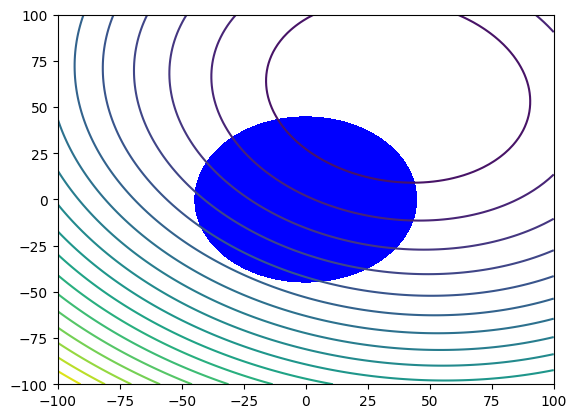

In [ ]:
levels = np.linspace(Z.min(), Z.max(), 20)

plt.contour(X, Y, Z, levels=levels)


plt.contourf(X, Y, X**2 + Y**2, levels = [0,2000] ,colors='Blue')


In [ ]:
#доп

In [ ]:
# linear regression + l2 + gd

class LinearRegressionNewtob(LinearRegression):
  def __init__(self, bias = False, C = 0):
    super().__init__(bias, C)
    self.svd = None
    self.gradient = lambda x, y, coef_: (x.T @ (x @ coef_ - y) + self.c * coef_) / x.shape[0]
    self.hessian = lambda x: x.T @ x

  def fit(self, x, y, epochs = 10000):
    if self.bias: x = np.insert(x, 0, 1, axis=1)
    self.coef_ = np.random.random(x.shape[1])
    for _ in range(epochs):
      self.coef_ -= np.linalg.inv(self.hessian(x)) @ self.gradient(x, y, self.coef_)
    return self


In [ ]:
LinearRegressionNewtob().fit(x,y).score(x,y)

1.0

In [ ]:
LinearRegressionSVD().fit(x,y).score(x,y)

1.0